# Hausa Sentiment Analysis: Model Evaluation

This notebook evaluates the performance of the fine-tuned HausaBERTa model on the Hausa sentiment test set.

Test Accuracy: 0.7439
Test Macro F1: 0.7451
Test Weighted F1: 0.7448
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1755
           1       0.67      0.76      0.71      1789
           2       0.73      0.67      0.70      1759

    accuracy                           0.74      5303
   macro avg       0.75      0.74      0.75      5303
weighted avg       0.75      0.74      0.74      5303



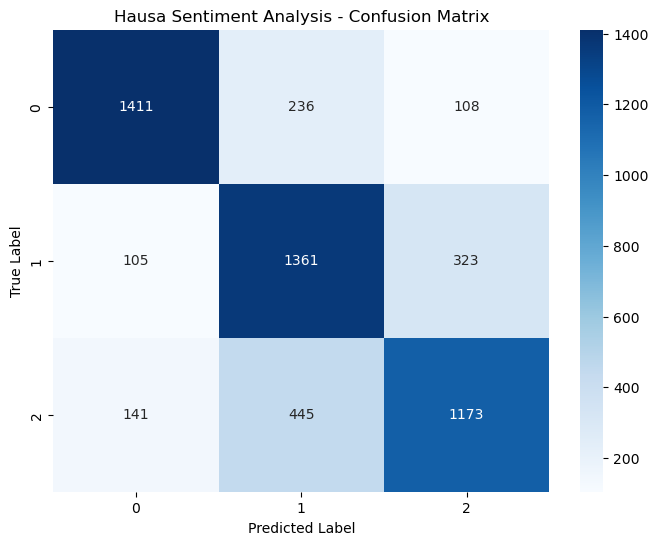

Results saved to reports/hausa_sentiment/logreg_test_results.json


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('data')
from hausa_preprocess import HausaTextPreprocessor


# Load model and label encoder
model_dir = 'models/hausa_sentiment'
model_path = os.path.join(model_dir, 'logreg_model.joblib')
encoder_path = os.path.join(model_dir, 'label_encoder.joblib')

pipeline = joblib.load(model_path)
label_encoder = joblib.load(encoder_path) if os.path.exists(encoder_path) else None

# Load test data
test_df = pd.read_csv('data/afrisenti_twitter_hausa_test_clean.csv')

# Preprocess test data
preprocessor = HausaTextPreprocessor()
test_df['tweet_clean'] = test_df['tweet_clean'].astype(str).apply(preprocessor.preprocess)
X_test = test_df['tweet_clean']
y_test = test_df['label']

# Encode labels if needed
if label_encoder:
    y_test_enc = label_encoder.transform(y_test)
else:
    y_test_enc = y_test

# Predict
preds_enc = pipeline.predict(X_test)
if label_encoder:
    preds = label_encoder.inverse_transform(preds_enc)
else:
    preds = preds_enc

# Metrics
acc = accuracy_score(y_test, preds)
macro_f1 = f1_score(y_test, preds, average='macro')
weighted_f1 = f1_score(y_test, preds, average='weighted')
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Macro F1: {macro_f1:.4f}")
print(f"Test Weighted F1: {weighted_f1:.4f}")
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
labels = sorted(y_test.unique())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Hausa Sentiment Analysis - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Save results
os.makedirs('reports/hausa_sentiment', exist_ok=True)
results = {
    'accuracy': float(acc),
    'macro_f1': float(macro_f1),
    'weighted_f1': float(weighted_f1),
    'classification_report': classification_report(y_test, preds, output_dict=True),
    'confusion_matrix': cm.tolist(),
    'labels': list(labels)
}
# with open('reports/hausa_sentiment/logreg_test_results.json', 'w') as f:
#     json.dump(results, f, indent=2)
# print('Results saved to reports/hausa_sentiment/logreg_test_results.json')

import numpy as np

def convert(o):
    if isinstance(o, np.generic):
        return o.item()
    raise TypeError

with open('reports/hausa_sentiment/logreg_test_results.json', 'w') as f:
    json.dump(results, f, indent=2, default=convert)
print('Results saved to reports/hausa_sentiment/logreg_test_results.json')